David Giacobbi, CPSC 322, Fall 2023, Notebook for HW-7

# 1. Load Libraries

 Import the various data and utility functions.

In [1]:
from decision_tree import *
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

# 2. Creating and Drawing Decision Trees

TODO: Create and draw **two** different and interesting decision trees (i.e., with a couple of attributes, multiple values, and multiple leaf nodes). You should create your decision trees directly using the decision tree classes (AttributeNode and LeafNode). Note that to draw the trees, use the draw_tree function with the display flag set to False. The result of the draw tree function can then be displayed inline in the notebook. For example:
 ```python
 diagram = draw_tree(root, 'tmp-1.dot', False)
 diagram
```

### Decision Tree 1

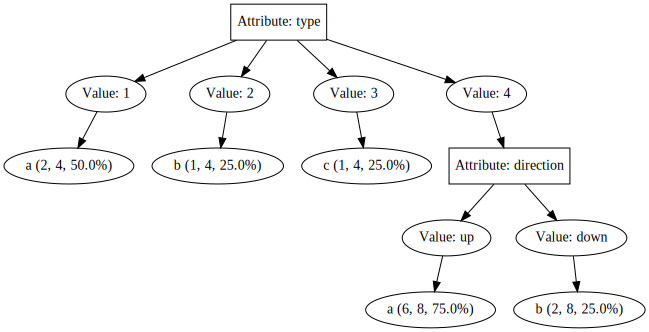

In [2]:
lf1 = LeafNode('a', 2, 4)
lf2 = LeafNode('b', 1, 4)
lf3 = LeafNode('c', 1, 4)
a_node = AttributeNode("direction", {"up": [LeafNode('a', 6, 8)], "down": [LeafNode('b', 2, 8)]})

root = AttributeNode("type", {'1': [lf1], '2': [lf2], '3': [lf3], '4': a_node})
draw_tree(root, "test_tree1.dot", False)

### Decision Tree 2

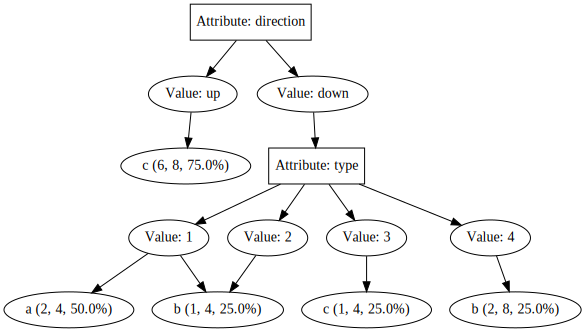

In [3]:
lf1 = LeafNode('a', 2, 4)
lf2 = LeafNode('b', 1, 4)
lf3 = LeafNode('c', 1, 4)
a_node = AttributeNode("type", {'1': [lf1,lf2], '2': [lf2], '3': [lf3], '4': [LeafNode('b', 2, 8)]})

root = AttributeNode("direction", {"up": [LeafNode('c', 6, 8)], "down": a_node})
draw_tree(root, "test_tree2.dot", False)

# 3. Auto MPG Data Analysis

Load and clean auto data.

In [4]:
auto = DataTable(['mpg','cyls','disp','hp','weight','accl','year','origin','name'])
auto.load('auto-mpg.txt')

#  1. Removing all duplicate rows
auto = remove_duplicates(auto)

#  2. Removing all rows with missing values in any of the columns
auto = remove_missing(auto, auto.columns())

## Step 1: Data Prep and Initial Decision Trees 

3. Discretize the mpg value in the auto table using three equal-width bins
4. Create a decision tree from the auto data using your tdidt() function over the attributes 'cyls', 'year', and 'origin' categorical features.
5. Draw the resulting decision tree.

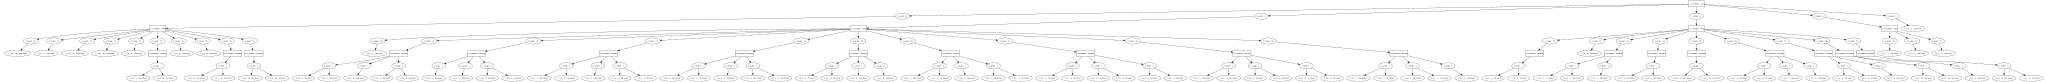

In [5]:
discretize(auto, 'mpg', [20, 30])

auto_tree = tdidt(auto, 'mpg', ['cyls', 'year', 'origin'])
draw_tree(auto_tree, "auto_tree.dot", False)

6. Clean up the decision tree using the "resolve attribute values" function
7. Clean up the resulting tree using the "resolve leaf nodes" function
8. Draw the resulting "cleaned up" decision tree

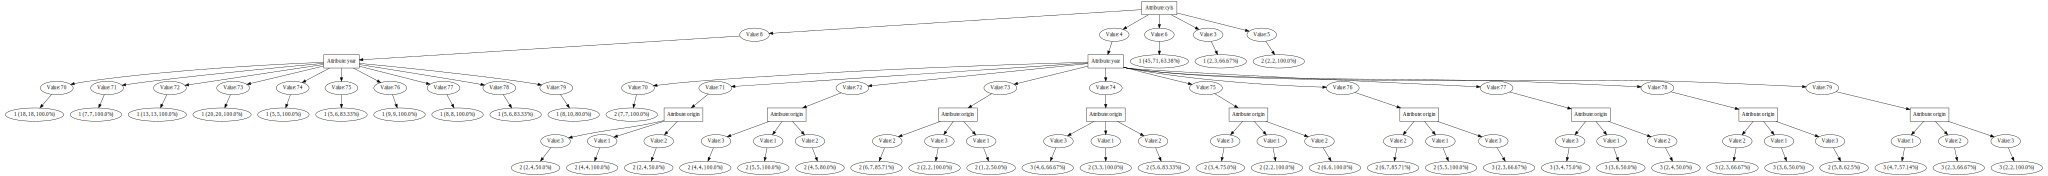

In [6]:
clean_auto_tree = resolve_attribute_values(auto_tree, auto)
clean_auto_tree = resolve_leaf_nodes(clean_auto_tree)
draw_tree(clean_auto_tree, "cleaned_auto.dot", False)

9. Finally, after looking through the decision trees created, provide your observations regarding them and the corresponding rules they capture. You don't need to list all the rules, but provide some general observations on the trees. 

One of the biggest I noticed in the resolution calls is the removal attribute from the cleaned tree. Such an action implies that origin may not necessarily have the greatest influence on mpg prediciton, suggesting that there may be a better feature to build the decision tree on. It also left the greatest node for each attribute label, rather than showing every option thanks to resolving the leaf nodes.

## Step 2: Experimentation with Auto MPG Data Classification

*TODO: Use stratified k-fold cross validation (i.e., your tdidt_stratified() function) to predict mpg labels using 10 folds. Display the resulting confusion matrix. In addition, compute accuracy, precision, recall, and the f-measure over the resulting confusion matrix and display each. Compare your results to the results you obtained using knn and naive bayes in HW-6* 

In [7]:
# Evaluate stratified decision tree
k_fold_matrix = tdidt_stratified(auto, 10, 'mpg', ['cyls', 'year', 'origin'])
print(k_fold_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(auto, ['mpg']):
    acc.append(accuracy(k_fold_matrix, label))
    prec.append(precision(k_fold_matrix, label))
    rec.append(recall(k_fold_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(auto, ['mpg']):
    cur_recall = recall(k_fold_matrix, label)
    cur_precision = precision(k_fold_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    3
--------  ---  ---  ---
       1  145    4    0
       2   32   70   20
       3    0   18   18

Average Accuracy: 0.8393051031487513

Average Precision: 0.6845876050972434

Average Recall: 0.6823082847397953

Macro Average f-measure: 0.6767542153701204


In comparision to knn and naive bayes, the decision tree appeared to perform very strong in comparision. This is due to the fact that most of the leaves in the cleaned decision tree resulted in a one prediction. As a result the tree looked to predict 1 in most test instances. For this case, decision tree would be the adequate choice of classifier in comparison to the others as the dataset was filled with a lot of one values.

# 4. Titanic Data Analysis

Load the titanic data set below. The attributes are *class*, *age*, *gender*, and *survival*.

In [8]:
titanic = DataTable(['class', 'age', 'gender', 'survival'])
titanic.load('titanic.txt')

*TODO: Repeat steps 1 and 2 (as appropriate) from Section 3 for the titanic data set. Again, compare your results to the results you obtained using knn and naive bayes for the titanic data set in HW-6.*

Create the initial tree for titanic and draw tree:

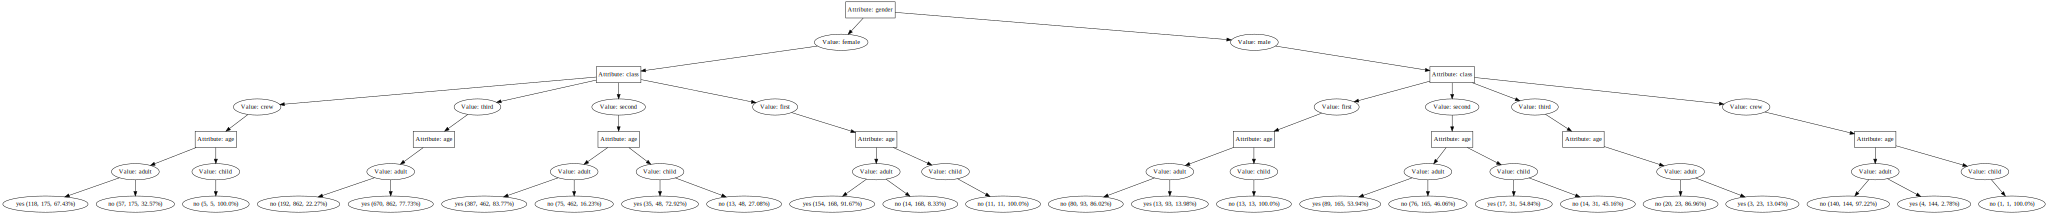

In [9]:
titanic_tree = tdidt(titanic, 'survival', ['class', 'age', 'gender'])
draw_tree(titanic_tree, "titanic_tree.dot", False)

Clean the tree by resolving leaf and attribute nodes:

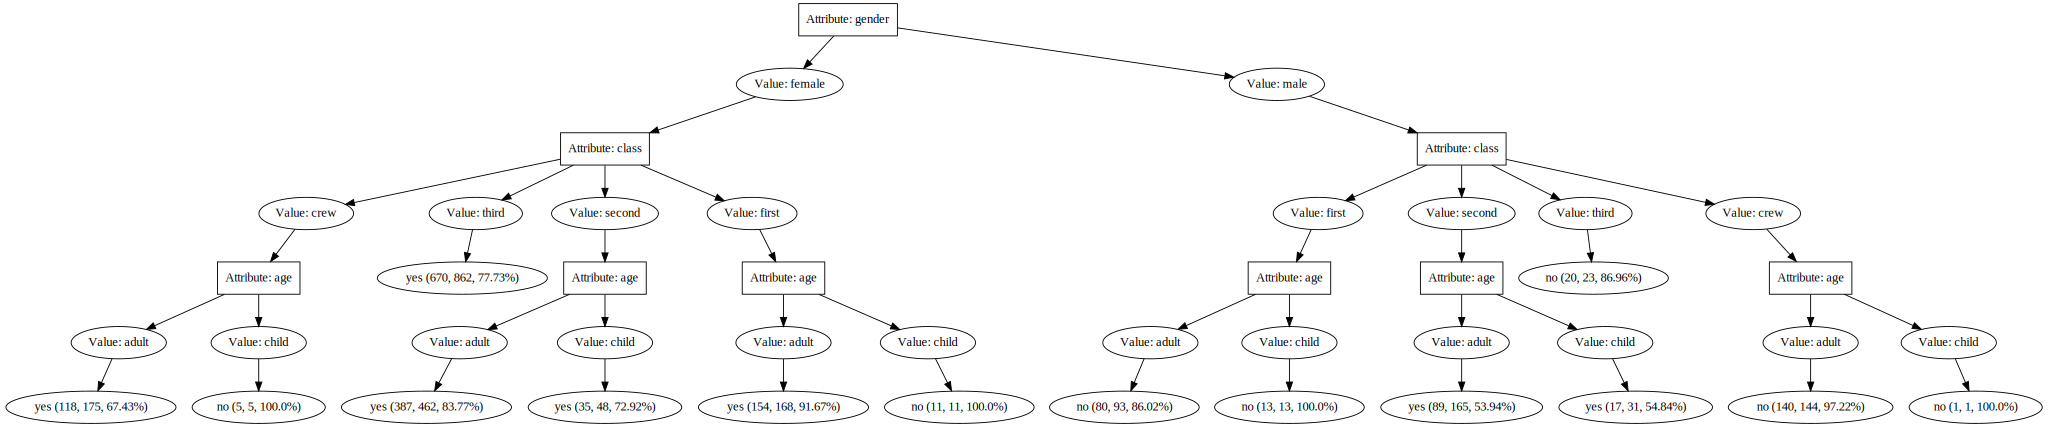

In [10]:
clean_titanic_root = resolve_attribute_values(titanic_tree, titanic)
clean_titanic_root = resolve_leaf_nodes(clean_titanic_root)
draw_tree(clean_titanic_root, "clean_titanic.dot", False)

Stratified Evaluation and Analysis:

In [11]:
# Evaluate stratified decision tree
k_fold_matrix = tdidt_stratified(titanic, 10, 'survival', ['class', 'age', 'gender'])
print(k_fold_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(titanic, ['survival']):
    acc.append(accuracy(k_fold_matrix, label))
    prec.append(precision(k_fold_matrix, label))
    rec.append(recall(k_fold_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(titanic, ['survival']):
    cur_recall = recall(k_fold_matrix, label)
    cur_precision = precision(k_fold_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

actual      yes    no
--------  -----  ----
yes        1470    20
no          443   268

Average Accuracy: 0.789641072239891

Average Precision: 0.8494910553522681

Average Recall: 0.6817555385646457

Macro Average f-measure: 0.7002400578656823


In this example, it is apparent that the classifier has overwhelming selected yes for the instances. Similar to the mpg prediction, yes was the most likely choice for each instance, and the classifier has a weak no prediction as a result. In comparision to the naive bayes classifier and the knn classifier, it would seem that the decision tree is not the first choice as it only picks between two labels.

# 5. Student Stress Data Analysis

Load the student stress data set below. The attributes are given below in column order, where the short name to use is given in parenthesis: 
1. sleep_quality (sleep)
2. living_conditions (living)
3. basic_needs (basics)
4. academic_performance (academic)
5. study_load (study)
6. future_career_concerns (career)
7. social_support (social)
8. extracurricular_activities (extra)
9. stress_level (stress)

In [12]:
student_stress = DataTable(['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra', 'stress'])
student_stress.load('student-stress.txt')

*TODO: Repeat steps 1 and 2 (as appropriate) from Section 3 for the student stress data set (using the same features as in HW-6). Again, compare your results to the results you obtained using knn and naive bayes for the student stress data set in HW-6.*

Create the initial tree for student stress and draw tree:

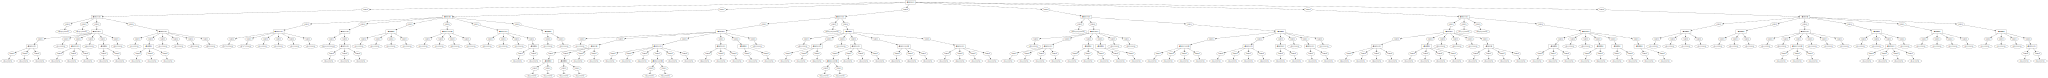

In [13]:
stress_tree = tdidt(student_stress, 'stress', ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
draw_tree(stress_tree, "stress_tree.dot", False)

Resolve the tree leaves and attribute nodes:

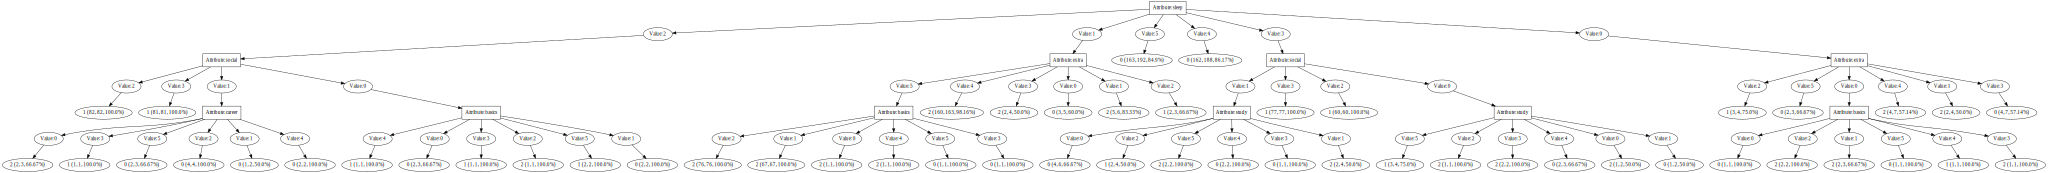

In [14]:
clean_stress_tree = resolve_attribute_values(stress_tree, student_stress)
clean_stress_tree = resolve_leaf_nodes(clean_stress_tree)

draw_tree(clean_stress_tree, "clean_stress.dot", False)

Stratified Evaluation and Analysis:

In [15]:
# Evaluate stratified decision tree
k_fold_matrix = tdidt_stratified(student_stress, 10, 'stress', ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
print(k_fold_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(student_stress, ['stress']):
    acc.append(accuracy(k_fold_matrix, label))
    prec.append(precision(k_fold_matrix, label))
    rec.append(recall(k_fold_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(student_stress, ['stress']):
    cur_recall = recall(k_fold_matrix, label)
    cur_precision = precision(k_fold_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    0
--------  ---  ---  ---
       1  314   14   30
       2   12  317   40
       0    9   23  341

Average Accuracy: 0.9224242424242424

Average Precision: 0.887492452373786

Average Recall: 0.8834608927114828

Macro Average f-measure: 0.8843348878174012


This final decision tree appeared to have the best accuracy of all the decision trees, given the fact there were so many categorical attributes to choose from. This decision tree excelled in comparison to knn and naive bayes since so many of the leaves had 100% certainty of being correct. This shows that large categorical datasets thrive best under the decision tree.

# 6. Issues, Challenges, and Observations

I think that the most difficult part of this project was trying to figure out how to recurse through the resolution functions. When building the tree initially, it made sense which base cases were correct and when to recurse. However, the resolving the attribute nodes provided me with issues as I struggled at first to fully understand just what fixing an attribute node meant. Additionally, I was curious as to which resolution should be called first when cleaning the tree. Overall, however, I enjoyed the challenge of this homework and I feel like I have a better grasp on decision trees as a whole and their use of entropy in the calculations.

Overall, decision trees had a very quick build time in comparison to knn and naive bayes. This is a serious positive to decision trees as the recursive nature of the function allows it to develop models for large datasets in a very short period of time. Additionally it appeared that the more categorical data, that is well distributed, that the decision tree can build on, the more accurate it is in performance.